# Machine Learning Model Building for BigDS

##### Import file dữ liệu đã được chuẩn hóa cũng như xử lí

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
file_path = 'Car_Prediction_Splitdata/big/scaled_big_car_used_data_ftloc_with_outliers.csv'
file_name_with_extension = os.path.basename(file_path)
file_name, file_extension = os.path.splitext(file_name_with_extension)

##### Tạo bảng ghi lại độ chính xác của các mô hình

In [3]:
import csv
import math

data = [
    ['RandomForestRegressor', None, None, None, None, None, None],
    ['DecisionTreeRegressor', None, None, None, None, None, None],
    ['XGBRegressor', None, None, None, None, None, None],
    ['BaggingRegressor', None, None, None, None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score','Cross validation score', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'Diff']

file_name = file_name + '_result.csv'

# Tạo và ghi vào file CSV
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

##### Ghi kết quả vào file csv đã tạo

In [4]:
def write_result(name,r2_score_value,scores_value,mean_squared_error,mean_absolute_error,root_mean_squared_error,diff_value):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    for row in data:
        if row[0] == name:
            row[1] = r2_score_value
            row[2] = scores_value
            row[3] = mean_squared_error
            row[4] = mean_absolute_error
            row[5] = root_mean_squared_error
            row[6] = diff_value

    # Ghi lại dữ liệu đã cập nhật vào file CSV
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [3]:
df= pd.read_csv('Car_Prediction_Splitdata/big/scaled_big_car_used_data_with_outliers.csv')
df.head()

,maker_model,variants,body_type,type,seat,door,mileage,non_smoker_vehicle,power,gearbox,engine_size,fuel_type,emission_classe,colour,manufacturer_colour,upholstery_colour,upholstery,car_age,inspection_interval,price (€)
0,-1.500352,0.218739,0.433270,0.419918,0.155740,-0.434859,-0.019211,-1.731720,0.820551,-0.622728,0.884367,-0.893815,0.676819,-0.013562,-0.329873,1.475588,-0.112520,-0.546681,0.466211,74960
1,1.379300,1.072728,1.892357,0.419918,0.155740,0.746877,1.121112,-1.731720,-0.078632,-0.622728,-0.016526,-1.030832,-0.730657,0.214446,-0.336681,-0.341443,-0.818773,0.090389,0.466211,22970
2,1.140293,0.625774,1.892357,0.419918,-2.087474,-0.434859,0.053618,0.577461,-0.720905,-0.622728,-0.016526,-1.030832,-0.730657,1.126480,-0.916674,-0.341443,1.299987,-0.334324,-0.960946,27999
3,-1.249780,1.603253,0.676451,0.419918,0.155740,-0.434859,0.398063,0.577461,1.334370,-0.622728,0.912323,-0.071712,-0.730657,-1.153605,1.122832,-1.249958,-0.112520,0.090389,0.466211,38499
4,-0.004629,1.528637,0.676451,0.419918,0.155740,0.746877,-0.315990,-1.731720,1.141688,-0.622728,0.004216,-0.208729,0.676819,0.898472,0.299133,-0.341443,1.299987,-0.334324,0.466211,38560


In [4]:
X = df.drop(['price (€)'], axis = 1)
Y = df['price (€)']

##### Import các thư viện cần thiết cho việc đánh giá và so sánh mô hình

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split

##### Chia tập dữ liệu Train và Test với tỉ lệ 7:3

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=9, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7319, 19)
Training target vector size: (7319,)
Test feature matrix size: (3138, 19)
Test target vector size: (3138,)


## Kiểm thử và đánh giá trên từng mô hình

### RandomForestRegressor

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('RandomForestRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 90.44055564285706
mean_squared_error: 138064854.14224353
mean_absolute_error: 4763.189536978866
root_mean_squared_error: 11750.100175838652

Cross validation score : 86.90097075183073

R2_Score - Cross Validation Score : 3.5395848910263368


##### Đồ thị so khớp của mô hình

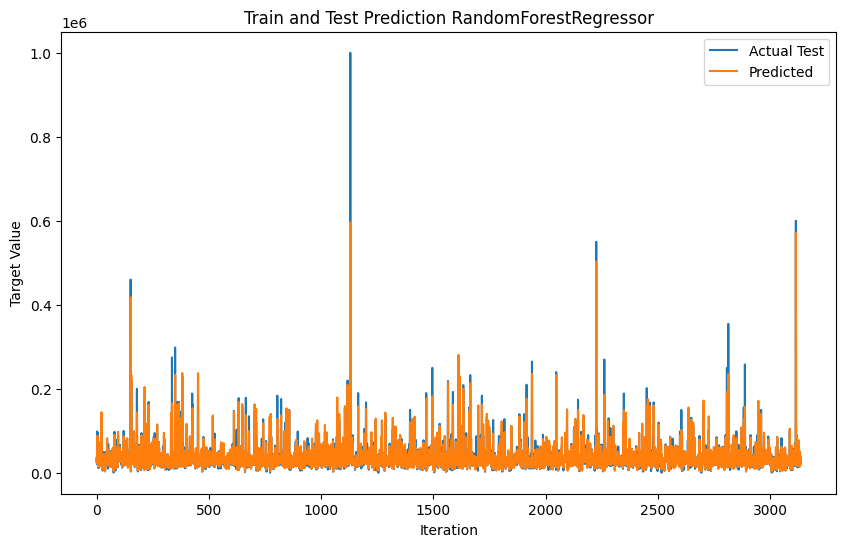

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction RandomForestRegressor')
plt.legend()
plt.savefig('RandomForestRegressor_big.png')
plt.show()

### XGBRegressor

In [13]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('XGBRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 93.00369224127192
mean_squared_error: 101046062.31859837
mean_absolute_error: 4270.958696175716
root_mean_squared_error: 10052.167045896043

Cross validation score : 89.89870769965727

R2_Score - Cross Validation Score : 3.1049845416146553


##### Đồ thị so khớp của mô hình

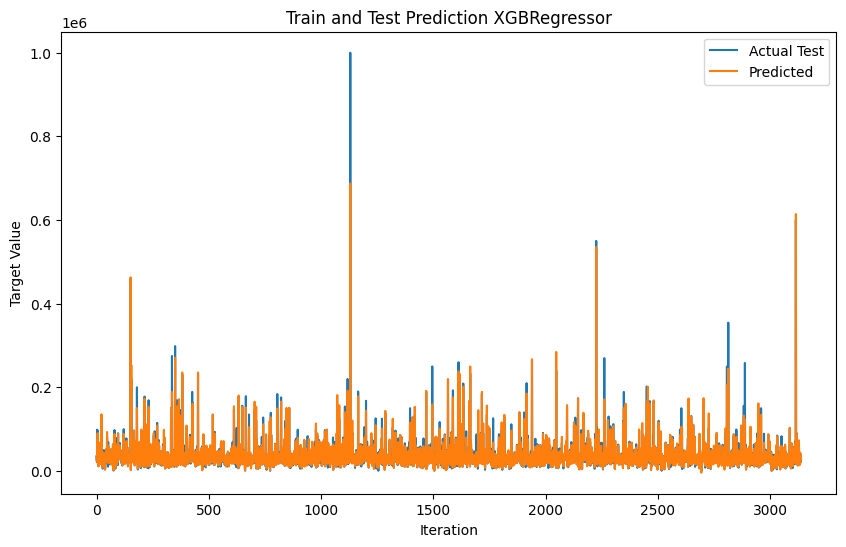

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction XGBRegressor')
plt.legend()
plt.savefig('XGBRegressor_big.png')
plt.show()

##### Đồ thị Loss của mô hình tốt nhất

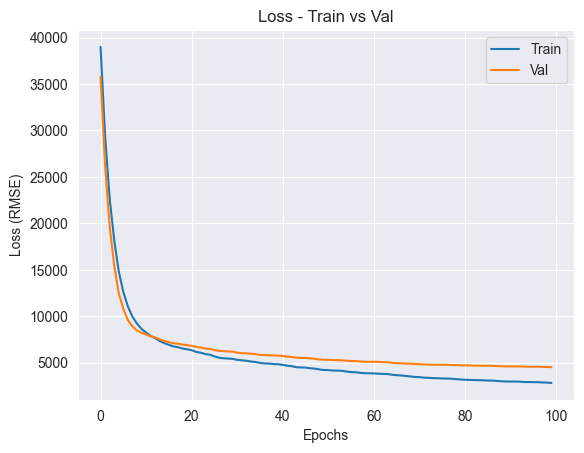

In [8]:
import matplotlib.pyplot as plt

_, X_val, _, Y_val = train_test_split(X, Y, test_size=0.2, random_state=20)
# Huấn luyện mô hình XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=False)

# Thu thập thông tin loss từ quá trình huấn luyện
train_loss = XGB.evals_result()['validation_0']['rmse']
test_loss = XGB.evals_result()['validation_1']['rmse']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Loss - Train vs Val')
plt.legend()
plt.savefig('loss_plot_big.png')
plt.show()

### DecisionTreeRegressor

In [16]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('DecisionTreeRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 85.95095907255437
mean_squared_error: 202907063.8438142
mean_absolute_error: 6131.1834501805815
root_mean_squared_error: 14244.545055698136

Cross validation score : 71.06426007346106

R2_Score - Cross Validation Score : 14.886698999093312


##### Đồ thị so khớp của mô hình

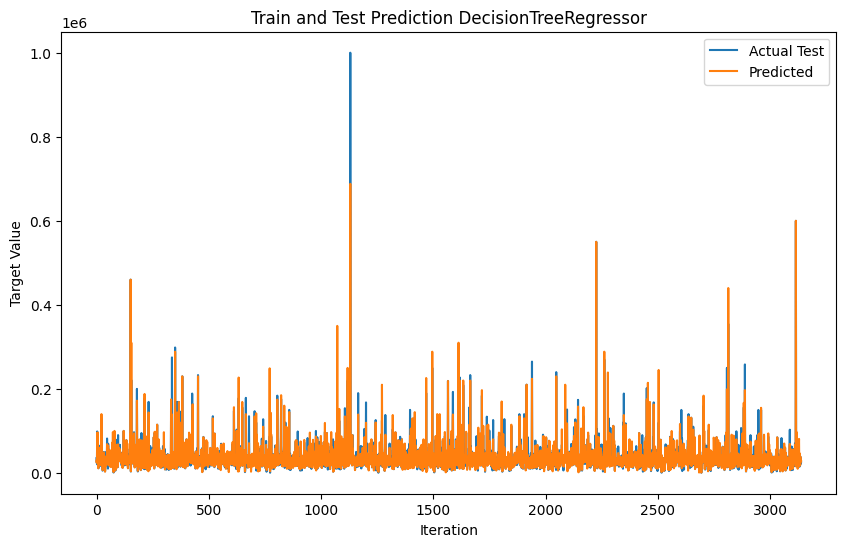

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction DecisionTreeRegressor')
plt.legend()
plt.savefig('DecisionTreeRegressor_big.png')
plt.show()

### BaggingRegressor

In [18]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('BaggingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 89.35209816604466
mean_squared_error: 153785194.90282863
mean_absolute_error: 5147.41068393578
root_mean_squared_error: 12401.015881887606

Cross validation score : 85.43223103645923

R2_Score - Cross Validation Score : 3.919867129585427


##### Đồ thị so khớp của mô hình

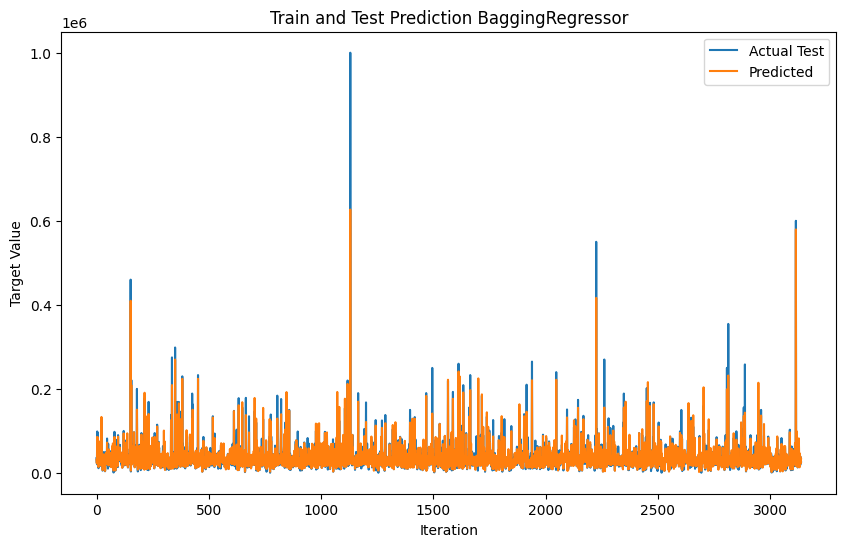

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction BaggingRegressor')
plt.legend()
plt.savefig('BaggingRegressor_big.png')
plt.show()

### Đánh giá các mô hình hoạt động trên Dataset
###### Từ hình ảnh so khớp nhận dạng và thực tế :
<img src="combined_image_big.png" alt="pred" width="1600">

###### Ta có thể thấy rằng các mô hình có xu hướng dự đoán khá giống nhau ( chúng đều dự đoán sai ở những outlier) . Từ 4 mô hình , ta có thể nhận thấy rằng các mô hình đều dự đoán tốt. Điều này cũng cho thấy rằng tập dữ liệu là đủ lớn để mô hình học và thực hiện dự đoán.

### Quyết định mô hình

##### Từ bảng kết quả R2_Score và RMSE của 4 dataset khác nhau :

![R2_Score](r2_score_comparison_bigDS.png)

![RMSE](RMSE_comparison_bigDS.png)

![loss_big](loss_plot_big.png)

###### Từ các hình ảnh trên về R2_Score và RMSE thì ta có thể dễ dàng nhìn thấy được rằng 2 mô hình tốt nhất trong 4 mô hình đó là XGBRegressor và RandomForestRegressor.Mô hình XGBRegressor luôn cao cho R2_Score cao trong mọi file và RMSE cũng luôn thấp,điều này có thể ta có 1 kết luận rằng mô hình XGBregressor là mô hình tuyệt vời khi áp dụng cho tập dữ liệu BigData ,đồng thời ta cũng có thể xem đồ thị loss của mô hình XGB ở trên để có thể chắc chắn rằng sự lựa chọn của chúng ta là đúng đắn, vì đồ thị cho thấy rằng XGBRegressor đã được huấn luyện 1 cách khá chính xác trên tập dữ liệu. Còn mô hình RandomForestRegressor cũng cho kết quả không tệ khi luôn chiếm điểm đánh giá thứ 2 và rất gần XGBRegressor.
###### Vì vậy ở đây sau khi tôi đã chọn ra được 2 mô hình được cho là tốt nhất thì tôi sẽ tiến hành Hyperparameter Tunning từng mô hình để đánh giá và có cái nhìn tổng quan hơn, và cũng để xem liệu sau khi HyperParameter Tunning thì liệu RandomForestRegressor có hơn được XGBRegressor không ?

##### Dùng **GridSearchCV** để thực hiện kiểm tra chéo và tìm ra siêu tham số tốt nhất
###### Ở đây tôi sẽ chọn GridSearchCV thay vì RandomizedSearchCV , mặc dù thời gian chạy có vẻ sẽ khá là lâu nhưng kết chúng ta nhận được sẽ là kết quả chính xác nhất và có cơ sở nhất

### 1. Trên mô hình XGBRegressor

##### Ý nghĩa của các siêu tham số được lựa chọn
- n_estimators: số lượng cây ra quyết định, số lượng cây đủ lớn sẽ làm tăng độ chính xác cho mô hình,nhưng ngược lại sẽ tăng thời gian huấn luyện.
- max_depth: Độ sâu tối đa của cây quyết định .Một độ sâu thích hợp giúp tránh overfitting (mô hình quá phức tạp) và underfitting (mô hình quá đơn giản).
- learning_rate : learning_rate xác định tốc độ cập nhật các trọng số trong quá trình huấn luyện. Tỷ lệ học nhỏ giúp mô hình hội tụ chậm hơn nhưng có thể đạt được độ chính xác cao hơn. Tuy nhiên, nếu tỷ lệ học quá lớn, mô hình có thể không hội tụ hoặc bị overfitting.
- subsample : Tỷ lệ mẫu con được sử dụng để xây dựng cây .Giá trị nhỏ hơn 1.0 giúp mô hình trở nên ổn định hơn và giảm khả năng overfitting
- colsample_bytree : Tỷ lệ đặc trưng được chọn ngẫu nhiên để xây dựng các cây con. Giá trị nhỏ hơn 1.0 giúp mô hình trở nên ổn định hơn và giảm khả năng overfitting.
- reg_alpha : tham số alpha trong regularization ,Tham số này điều chỉnh mức độ của regularization thông qua thành phần L1 regularization
- reg_lambda : tham số lambda trong regularization. Tham số này điều chỉnh mức độ của regularization thông qua thành phần L2 regularization


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [25]:
model = XGBRegressor()

In [26]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring='neg_mean_squared_error')

In [33]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

##### Các siêu tham số tốt nhất sau khi Tunning

In [34]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 1.0}

##### Huấn luyện lại mô hình tốt nhất với siêu tham số tốt nhất

In [28]:
Final_mod_XGB=XGBRegressor( colsample_bytree=1.0, learning_rate=0.2,
                                max_depth=5,reg_alpha=0.5,n_estimators=300,reg_lambda=0.5,subsample=1.0 )
Final_mod_XGB.fit(X_train,Y_train)
pred=Final_mod_XGB.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

scores = cross_val_score(Final_mod_XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

R2_Score: 93.82750768927647
mean_squared_error: 89147885.45606062
mean_absolute_error: 3991.5446811077927
RMSE value: 9441.815792317737

Cross validation score : 90.04381829960244


##### Lưu mô hình

In [37]:
import joblib
joblib.dump(Final_mod_XGB,"Car_Price_big_XGB.pkl")

['Car_Price_big_XGB.pkl']

In [38]:
# Loading the saved model
model=joblib.load("Car_Price_big_XGB.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([33255.188, 22196.86 , 22366.91 , ..., 24085.3  , 25018.512,
       27402.232], dtype=float32)

##### Xem các giá trị dự đoán và thực tế

In [39]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137
Predicted,33255.1875,22196.859375,22366.910156,85539.429688,24650.398438,79396.023438,29032.125,44156.058594,12705.339844,12032.976562,...,52069.082031,25503.806641,13966.584961,46318.269531,32428.986328,18354.707031,44658.328125,24085.300781,25018.511719,27402.232422
Actual,34997.0000,23607.000000,24480.000000,98646.000000,19990.000000,95990.000000,27888.000,44900.000000,14499.000000,11250.000000,...,42880.000000,27358.000000,14800.000000,37490.000000,38660.000000,18444.000000,38707.000000,25590.000000,22497.000000,24950.000000


##### Trực quan hóa bằng đồ thị

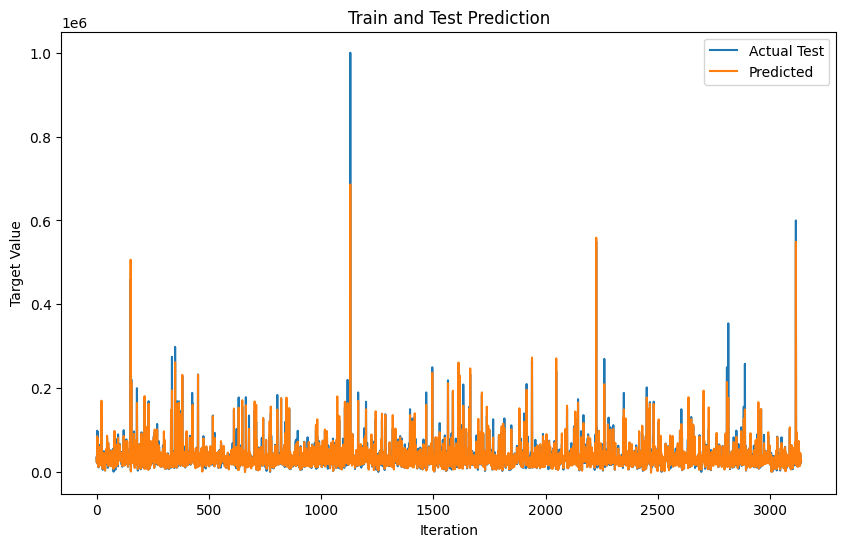

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), prediction, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction')
plt.legend()
plt.show()

#### 2. Trên mô hình RandomForestRegressor

##### Ý nghĩa của các siêu tham số được lựa chọn
###### Ở đây tôi sẽ không đề cập đến các siêu tham số giống ở mô hình XGBRegressor, tôi chỉ đề cập đến các siêu tham số khác biệt giữa 2 mô hình
- min_samples_split :Đây là số lượng mẫu tối thiểu cần có trong mỗi nút để tiếp tục phân chia. Nếu số lượng mẫu trong một nút nhỏ hơn giá trị này, thì việc phân chia sẽ dừng lại. Giá trị nhỏ hơn có thể dẫn đến overfitting, trong khi giá trị lớn hơn có thể dẫn đến underfitting.
- min_samples_leaf: Đây là số lượng mẫu tối thiểu được yêu cầu trong mỗi lá của cây. Nếu số lượng mẫu trong một lá nhỏ hơn giá trị này, thì cây sẽ không phân chia thêm và dừng lại. Giá trị nhỏ hơn có thể dẫn đến overfitting, trong khi giá trị lớn hơn có thể dẫn đến underfitting.
- max_features: Đây là số lượng đặc trưng được xem xét khi tìm kiếm phân chia tốt nhất trong cây quyết định.



In [57]:
parameters = {
    'n_estimators': [100, 200, 300],           # Số lượng cây
    'max_depth': [None, 5, 10],                 # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],            # Số lượng mẫu tối thiểu để phân chia một nút trong cây
    'min_samples_leaf': [1, 2, 4],              # Số lượng mẫu tối thiểu trong mỗi lá của cây
    'max_features': ['auto','log2']             # Số lượng đặc trưng được xem xét khi tìm kiếm phân chia tốt nhất
}

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

# Tinh chỉnh siêu tham số với RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters,
                                   scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
Final_mod_forest=RandomForestRegressor(max_depth=None, max_features='auto',
                                min_samples_split=2,min_samples_leaf=1,n_estimators=200)
Final_mod_forest.fit(X_train,Y_train)
pred=Final_mod_forest.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 90.75293095376803
mean_squared_error: 133553289.43960099
mean_absolute_error: 4755.106765541063
RMSE value: 11556.52583779403


In [55]:
import joblib
joblib.dump(Final_mod_forest,"Car_Price_big_RanFor.pkl")

['Car_Price_big_RanFor.pkl']

In [36]:
# Loading the saved model
model=joblib.load("Car_Price_big_RanFor.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([32250.09 , 25789.965, 27611.82 , ..., 24609.575, 25255.655,
       27746.35 ])

In [37]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])


,0,1,2,3,4,5,6,7,8,9,...,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137
Predicted,32250.09,25789.965,27611.82,82961.965,23577.985,90066.36,27913.225,41862.25,15674.0,14675.86,...,51476.18,24361.835,15925.7,48719.9,33003.1,18911.04,42820.31,24609.575,25255.655,27746.35
Actual,34997.00,23607.000,24480.00,98646.000,19990.000,95990.00,27888.000,44900.00,14499.0,11250.00,...,42880.00,27358.000,14800.0,37490.0,38660.0,18444.00,38707.00,25590.000,22497.000,24950.00


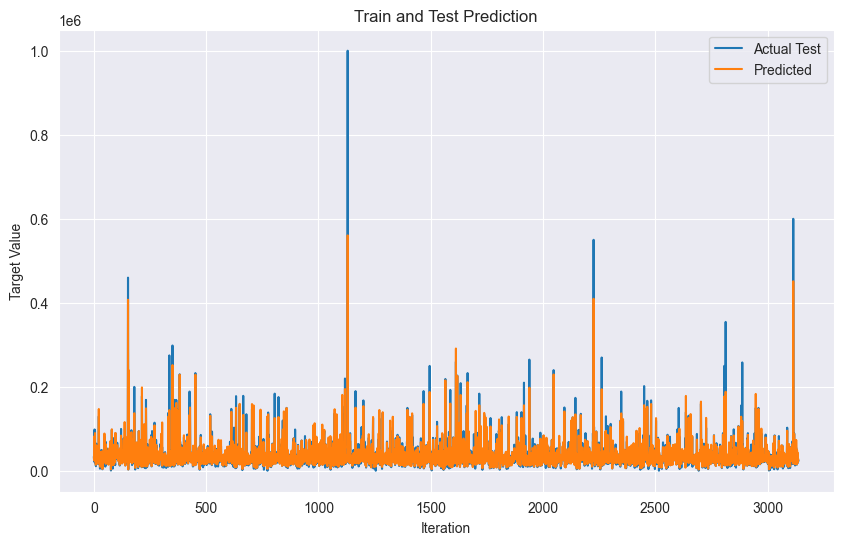

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), prediction, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction')
plt.legend()
plt.show()

# TỔNG KẾT

- Trong tập dữ liệu BigDS, mô hình được đánh giá là tốt nhất với R2_Score là 93% thuộc về XGBRegressor trong tập dữ liệu khi có **ftloc** và **with outliers** ,có kết quả dường như là gần bằng đó là ở tập dữ liệu **non-ftloc** và **with outliers**. Điều này cho ta 1 đánh giá rằng, việc lựa chọn đặc trưng của chúng ta thực hiện rất tốt,chúng ta đã chọn ra những đặc trưng có sức ảnh hưởng đến việc dự đoán giá xe. Đồng thời chỉ ra rằng, việc loại bỏ ngoại lệ 1 cách mù quáng sẽ dẫn tới kết quả mô hình đôi khi sẽ bị thấp thôi 1 cách rõ rệch, bằng chứng là ở tập **without outliers** và **không có ftloc** , kết quả dự đoán sẽ bị ảnh hưởng rất nhiều, đó là độ chính xác chỉ còn 85.55% , thấp hơn rất nhiều so với các tập dữ liệu khác.
- Sau khi HyperparamterTunning thì kết quả cho ta thấy rằng mô hình **XGB** tăng từ **93%** lên **93.85%**, một sự cải thiện khá là tốt. Còn ở mô hình RandomForest thì việc cải thiện chỉ hơn được khoảng **0.3%** (từ 90.44% lên 90.75%)
- Việc lựa chọn nhiều mô hình để kiểm thử và đánh giá cho ta 1 cái nhìn khách quan và toàn diện hơn để tìm ra mô hình tốt nhất cho dữ liệu. Đây cũng là 1 trong những việc rất cần thiết để nâng sự thành công trong việc dự đoán